In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
class Graph:
    def __init__(self):
        self.adjlist = dict()
        self.g = nx.DiGraph()
        
    def addedge(self, u, v, w):
        if u in self.adjlist:
            self.adjlist[u][v] = w
        else:
            self.adjlist[u] = {v:w}
        
        self.g.add_edge(u, v, weight=w)
        
    def visualize(self): 
        pos = nx.kamada_kawai_layout(self.g)
        nx.draw(self.g, pos=pos, with_labels=True, node_size=500, alpha=0.8)
        edge_labels = nx.get_edge_attributes(self.g, "weight")
        nx.draw_networkx_edge_labels(self.g, pos, edge_labels=edge_labels)
        plt.show()
        
    def visualizepath(self, path):
        edges = []
        
        for i in range(len(path)-1):
            edges.append((path[i], path[i+1]))

        pos = nx.kamada_kawai_layout(self.g)
        nx.draw(self.g, pos=pos, with_labels=True, node_size=500, alpha=0.8)
        nx.draw_networkx_nodes(self.g, pos=pos, nodelist=path, node_color='g')
        nx.draw_networkx_edges(self.g, pos, edgelist=edges, width=3, edge_color='r', alpha=1)
        edge_labels = nx.get_edge_attributes(self.g, "weight")
        nx.draw_networkx_edge_labels(self.g, pos, edge_labels=edge_labels)
        plt.show()

In [3]:
class PQueue:
    def __init__(self):
        self.queue = []
        
    def isEmpty(self):
        return len(self.queue) == 0
    
    def enqueue(self, eleid, ele, pri):
        self.queue.append((eleid, ele, pri))
    
    def dequeue(self):
        if self.isEmpty():
            return None, None
        
        minidx = None
        minpri = None
        for i in range(len(self.queue)):
            eleid, ele, pri = self.queue[i]
            
            if minpri == None or pri < minpri:
                minidx = i
                minpri = pri
        
        eleid, ele, pri = self.queue.pop(minidx)
        
        return eleid, ele, pri
    
    def contains(self, eleid):
        for eid, ele, p in self.queue:
            if eleid == eid:
                return p
        
        return None
    
    def replace(self, eleid, ele, pri):
        for i in range(len(self.queue)):
            eid, e, p = self.queue[i]
            if eid == eleid:
                self.queue.pop(i)
                self.enqueue(eleid, ele, pri)
                return 

In [4]:
def uniformcostsearch(g, start, end):
    q = PQueue()
    q.enqueue(start, [start], 0)
    
    visited = set()
    
    while not q.isEmpty():
        lastnode, path, cost = q.dequeue()
        
        if lastnode == end:
            return path, cost
        
        visited.add(lastnode)
        
        for i in g.adjlist[lastnode]:
            new_cost = cost + g.adjlist[lastnode][i]
            new_path = path[:]
            new_path.append(i)
            if i not in visited and q.contains(i) == None:
                q.enqueue(i, new_path, new_cost)
            else:
                prev_cost = q.contains(i)
                    
                if prev_cost != None and prev_cost > new_cost:
                    q.replace(i, new_path, new_cost)
    
    return None, None

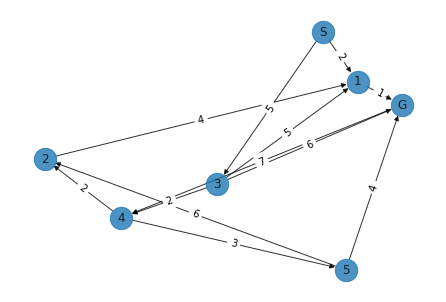

In [5]:
edges = [
    ('S','1',2), 
    ('S','3',5), 
    ('1','G',1), 
    ('2','1',4), 
    ('3','1',5), 
    ('3','4',2), 
    ('3','G',6), 
    ('4','5',3), 
    ('4','2',2), 
    ('5','2',6), 
    ('5','G',4), 
    ('G','4',7)
]

g = Graph()
for u, v, w in edges:
    g.addedge(u, v, w)
    
g.visualize()

Minimum cost from S to G is 3


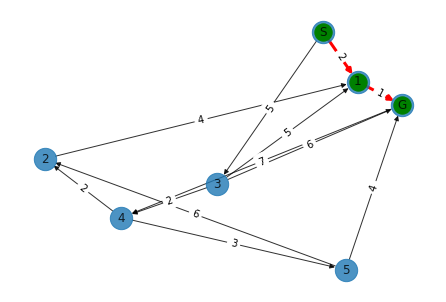

In [6]:
start = 'S'
end = 'G'

minpath, mincost = uniformcostsearch(g, start, end)

if mincost != None:
    print(f"Minimum cost from {start} to {end} is {mincost}")
    g.visualizepath(minpath)
else:
    print(f"No path available from {start} to {end}...")